## Supervised Learning

In [85]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 
import warnings
warnings.filterwarnings("ignore")

In [86]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [87]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

I wont see any missing values because of this note:
    
    Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [88]:
bank['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

    The example here showing that their job is Unknown-essentially a NAN.
    Since I really don't have a reason to yet, I will not adjust missing values (unknowns) yet.

    The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y)
    Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: "yes","no")
    I need to make the y column an integer so I can see it on a heatmap.

In [89]:
bank['y'] = bank['y'].replace({'no': 0, 'yes': 1})
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


    This is a great start, but I need to be able to see my non-numeric columns as well.

In [90]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [91]:
bank_encoded = pd.get_dummies(bank, columns=['month','day_of_week','contact','job','marital','education','default','housing','loan','poutcome'], prefix=['month','day_of_week','contact','job','marital','education','default','housing','loan','poutcome'])
bank_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,True,True,False,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,True,False,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,True,True,False,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,True,False,False,False,True,False


In [92]:
bank_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  month_apr                      41188 non-null  bool   
 12  month_aug                      41188 non-null 

    This was originally how I planned on converting the non-numeric values, but It creates too many columns and makes it more difficult to pinpoint correlations. I need to try a different way of doing this. Lets first try and narrow down some correlations and columns to delete, so I dont have to change every single column. 

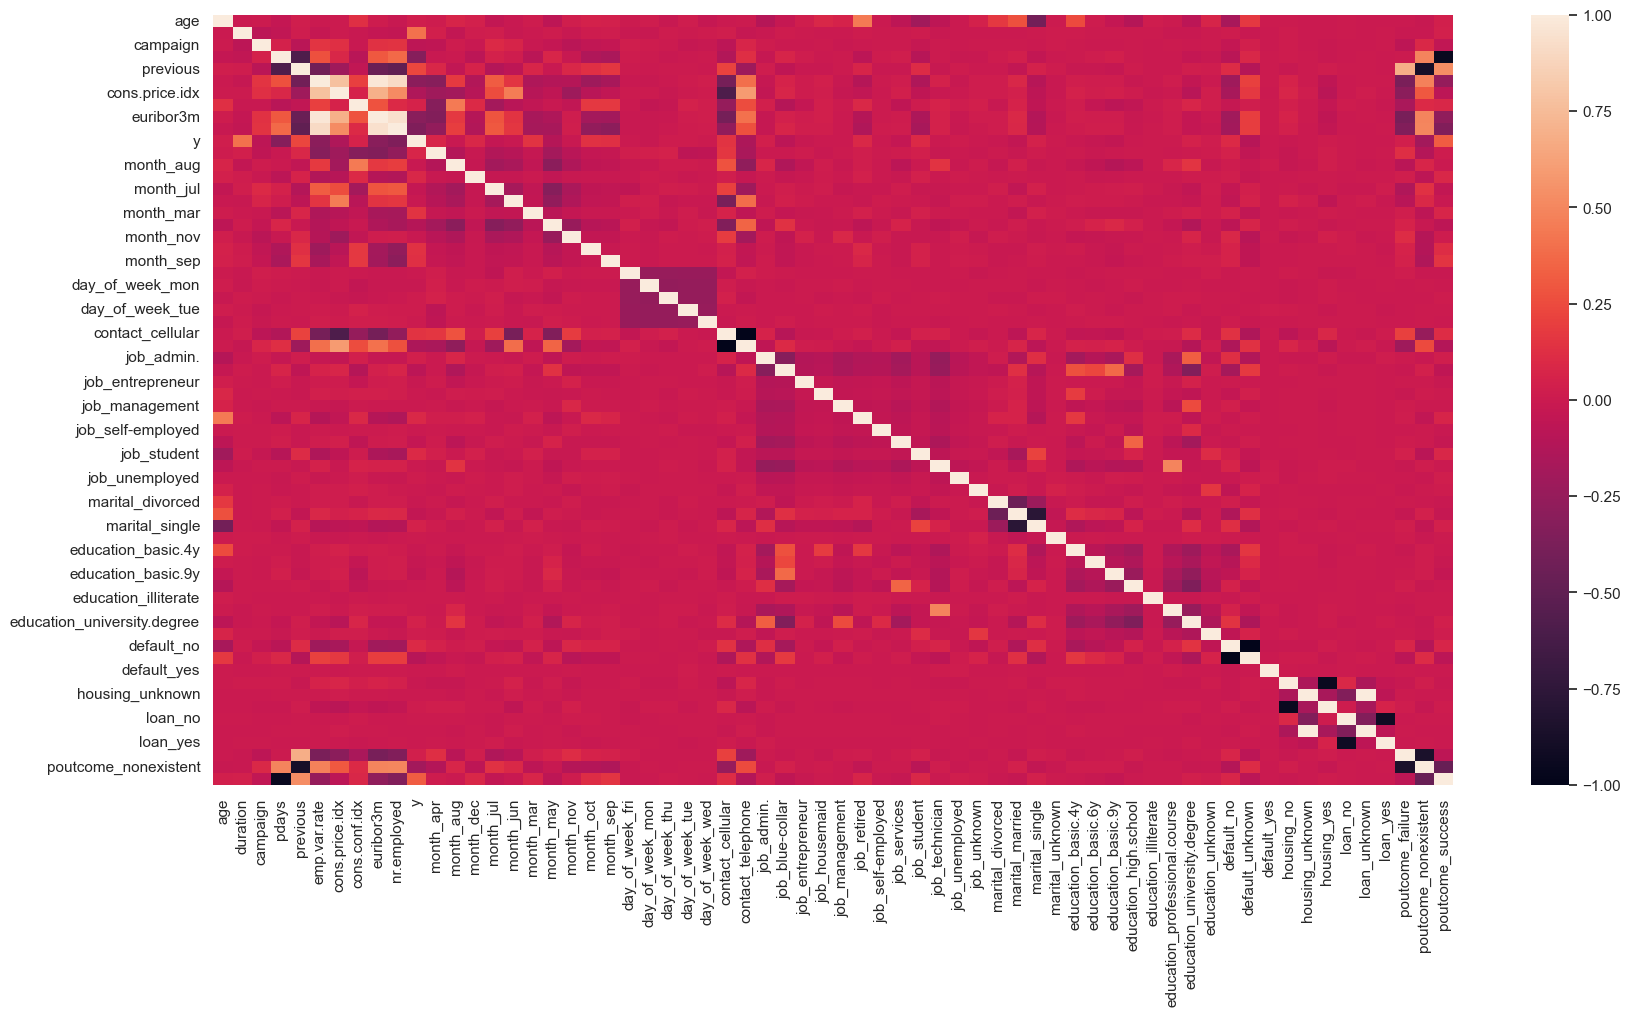

In [93]:
plt.figure(figsize=[20,10])
_ = sns.heatmap(bank_encoded.corr())

    Obviously, this is a lot and difficult to interpret. I know that I can also just get the numeric values for these as well, which will help me organize. 

In [94]:
corr = bank_encoded.corr()
corr['y'].sort_values(ascending=False).head(20)

y                              1.000000
duration                       0.405274
poutcome_success               0.316269
previous                       0.230181
contact_cellular               0.144773
month_mar                      0.144014
month_oct                      0.137366
month_sep                      0.126067
default_no                     0.099344
job_student                    0.093955
job_retired                    0.092221
month_dec                      0.079303
month_apr                      0.076136
cons.conf.idx                  0.054878
marital_single                 0.054133
education_university.degree    0.050364
poutcome_failure               0.031799
job_admin.                     0.031426
age                            0.030399
education_unknown              0.021430
Name: y, dtype: float64

In [95]:
corr = bank_encoded.corr()
corr['y'].sort_values(ascending=False).tail(20)

housing_no             -0.011085
month_nov              -0.011796
job_entrepreneur       -0.016644
day_of_week_mon        -0.021265
education_basic.6y     -0.023517
month_jul              -0.032230
job_services           -0.032301
marital_married        -0.043398
education_basic.9y     -0.045135
campaign               -0.066357
job_blue-collar        -0.074423
default_unknown        -0.099293
month_may              -0.108271
cons.price.idx         -0.136211
contact_telephone      -0.144773
poutcome_nonexistent   -0.193507
emp.var.rate           -0.298334
euribor3m              -0.307771
pdays                  -0.324914
nr.employed            -0.354678
Name: y, dtype: float64

    If I look at my top [correlations] I find that Duration, poutcome, and previous are my top 3 of the upper correlation and nr.employed, pdays, euribor3m, and emp.var.rate are my high 'negative' correlations. After 'previous' and before 'emp.var.rate' I see large jumps in correlation score and I don't want to cludder my information, so I will only use these strong connections! 

In [96]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [97]:
bank.drop(['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','cons.conf.idx','cons.price.idx',], axis=1, inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration      41188 non-null  int64  
 1   pdays         41188 non-null  int64  
 2   previous      41188 non-null  int64  
 3   poutcome      41188 non-null  object 
 4   emp.var.rate  41188 non-null  float64
 5   euribor3m     41188 non-null  float64
 6   nr.employed   41188 non-null  float64
 7   y             41188 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.5+ MB


    Now lets convert the only object column I need! 

In [98]:
bank['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

    since my 'y' column is set to no:0 and yes:1 I want to stay consistent !

In [99]:
bank['poutcome'] = bank['poutcome'].replace({'failure': 0, 'success': 1, 'nonexistent':2})
bank

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,2,1.1,4.857,5191.0,0
1,149,999,0,2,1.1,4.857,5191.0,0
2,226,999,0,2,1.1,4.857,5191.0,0
3,151,999,0,2,1.1,4.857,5191.0,0
4,307,999,0,2,1.1,4.857,5191.0,0
...,...,...,...,...,...,...,...,...
41183,334,999,0,2,-1.1,1.028,4963.6,1
41184,383,999,0,2,-1.1,1.028,4963.6,0
41185,189,999,0,2,-1.1,1.028,4963.6,0
41186,442,999,0,2,-1.1,1.028,4963.6,1


    Before I get into my train/test I should change the 'y' column by name to avoid confusion. 

    This was also very useful to determine I didn't really need to worry about any 'unknown' or 'NAN' values, since almost all of the starting data was numeric for the columns I ended up keeping.

In [100]:
bank.rename(columns={'y':'subscribed'},inplace=True)
bank

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,subscribed
0,261,999,0,2,1.1,4.857,5191.0,0
1,149,999,0,2,1.1,4.857,5191.0,0
2,226,999,0,2,1.1,4.857,5191.0,0
3,151,999,0,2,1.1,4.857,5191.0,0
4,307,999,0,2,1.1,4.857,5191.0,0
...,...,...,...,...,...,...,...,...
41183,334,999,0,2,-1.1,1.028,4963.6,1
41184,383,999,0,2,-1.1,1.028,4963.6,0
41185,189,999,0,2,-1.1,1.028,4963.6,0
41186,442,999,0,2,-1.1,1.028,4963.6,1


In [101]:
bank['euribor3m'].value_counts()

euribor3m
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: count, Length: 316, dtype: int64

In [102]:
import seaborn as sns

<Axes: xlabel='euribor3m', ylabel='subscribed'>

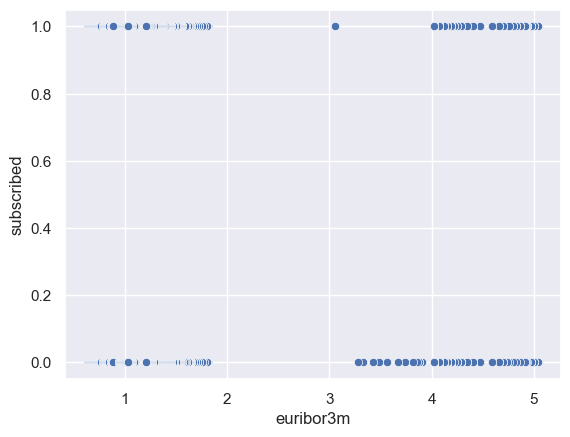

In [103]:
sns.scatterplot(data=bank,x='euribor3m',y='subscribed')

    euribor3m has to do with a 3-month interest rate shared bewteen eupean banks. It would seem the lower the interest the more people make a choice to subscribe, but it seems pretty even. I may consider removing this from my model and seeing how it impacts predictions, but I should see how else its involved.

<Axes: xlabel='poutcome', ylabel='euribor3m'>

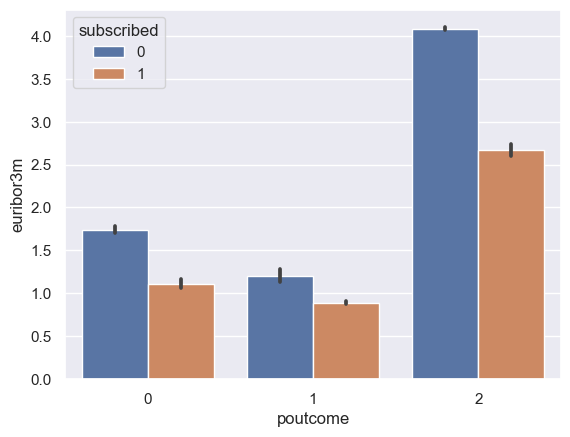

In [104]:
sns.barplot(data=bank,x='poutcome',y='euribor3m', hue='subscribed')

    This is interesting. Those at 2 on the x scale have no exisitng previous outcome, yet they have the highest euribor3m rate! At the same time, 1's on the x (or returning customers) have the lowest euribor3m rate! hmm..

<Axes: xlabel='poutcome', ylabel='subscribed'>

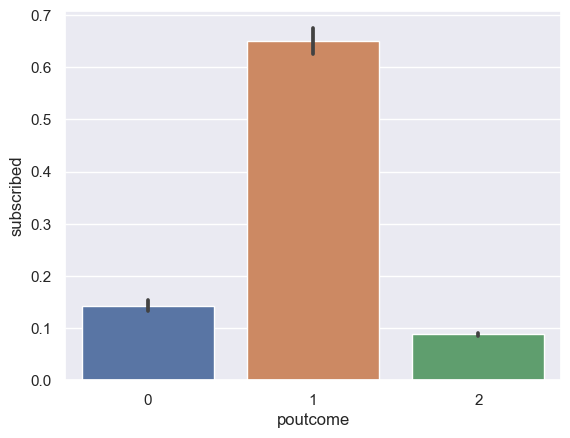

In [105]:
sns.barplot(data=bank,x='poutcome',y='subscribed')

    This makes sense! If they subscribed before, they most lilkey will again. and vice versa. but it seems that many who have no history of subscribing often don't. repeat customers are the way to go. 

<Axes: xlabel='previous', ylabel='subscribed'>

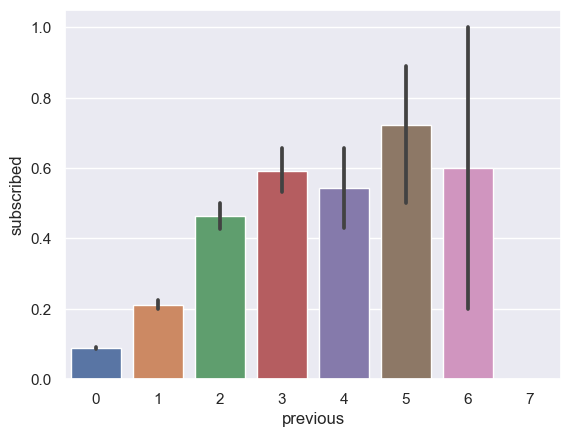

In [106]:
sns.barplot(data=bank,x='previous',y='subscribed')

    The previous column indicated # of times contacted before this campaign. It would seem the more you're contacted the more likely you are to subscribe. 

    Without doing really any model work, I would say that repreat customers are the best bet for future subscription and that never giving up (lots of contact) and timing the sunscription date with a lower euribor3m rates optimize success.

In [107]:
cols = bank.columns
target_col = 'subscribed'
feat_cols = [c for c in cols if c != target_col]
X = bank[feat_cols]
y = bank[target_col]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y (?)

In [109]:
scores = []
# remember the ending number for range is not inclusive
for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 91.00509832483613%


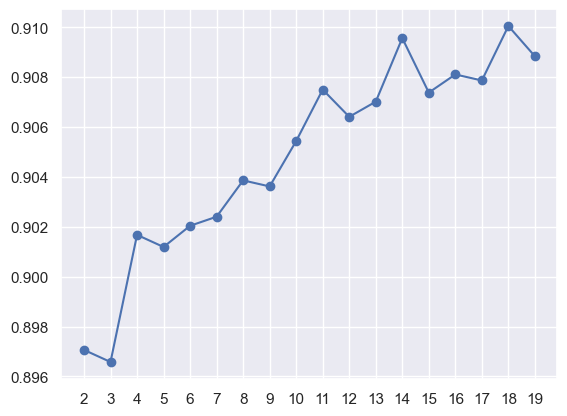

In [110]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
# plt.grid()
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

    My best K is at 18! Lets plug it in. 

In [111]:
model = KNeighborsClassifier(n_neighbors=18, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=18)

In [112]:
preds = model.predict(X_test)
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: subscribed, Length: 8238, dtype: int64
Predictions for test data set
[0 0 0 ... 0 1 0]


In [113]:
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    0
1871     0
Name: subscribed, Length: 8238, dtype: int64


In [114]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [115]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration      41188 non-null  int64  
 1   pdays         41188 non-null  int64  
 2   previous      41188 non-null  int64  
 3   poutcome      41188 non-null  int64  
 4   emp.var.rate  41188 non-null  float64
 5   euribor3m     41188 non-null  float64
 6   nr.employed   41188 non-null  float64
 7   subscribed    41188 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.5 MB


In [116]:
bank

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,subscribed
0,261,999,0,2,1.1,4.857,5191.0,0
1,149,999,0,2,1.1,4.857,5191.0,0
2,226,999,0,2,1.1,4.857,5191.0,0
3,151,999,0,2,1.1,4.857,5191.0,0
4,307,999,0,2,1.1,4.857,5191.0,0
...,...,...,...,...,...,...,...,...
41183,334,999,0,2,-1.1,1.028,4963.6,1
41184,383,999,0,2,-1.1,1.028,4963.6,0
41185,189,999,0,2,-1.1,1.028,4963.6,0
41186,442,999,0,2,-1.1,1.028,4963.6,1


In [117]:
array = bank.values

In [118]:
X = array[:, 0:7]
y = array[:, 7]

In [119]:
X #features

array([[ 2.6100e+02,  9.9900e+02,  0.0000e+00, ...,  1.1000e+00,
         4.8570e+00,  5.1910e+03],
       [ 1.4900e+02,  9.9900e+02,  0.0000e+00, ...,  1.1000e+00,
         4.8570e+00,  5.1910e+03],
       [ 2.2600e+02,  9.9900e+02,  0.0000e+00, ...,  1.1000e+00,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 1.8900e+02,  9.9900e+02,  0.0000e+00, ..., -1.1000e+00,
         1.0280e+00,  4.9636e+03],
       [ 4.4200e+02,  9.9900e+02,  0.0000e+00, ..., -1.1000e+00,
         1.0280e+00,  4.9636e+03],
       [ 2.3900e+02,  9.9900e+02,  1.0000e+00, ..., -1.1000e+00,
         1.0280e+00,  4.9636e+03]])

In [120]:
y

array([0., 0., 0., ..., 0., 1., 0.])

In [121]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) #even though this says 'regression' I know this model is used for Classification! 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [122]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [123]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.906009 (0.002850)
LDA: 0.906191 (0.002774)
KNN: 0.904219 (0.003042)
CART: 0.894294 (0.002338)
NB: 0.841214 (0.002690)
SVM: 0.893991 (0.001994)


In [124]:
from matplotlib import pyplot

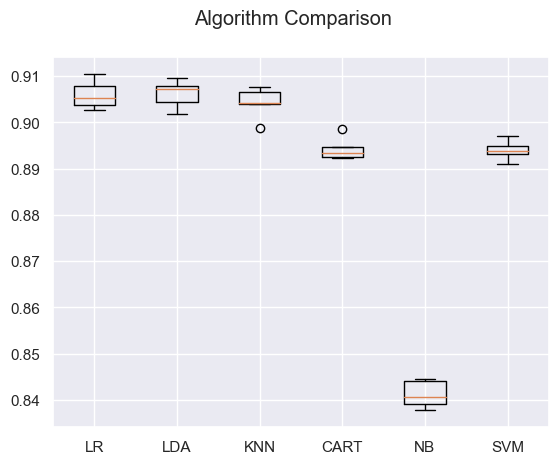

In [125]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

    LR and LDA seem pretty strong graphically and score wise are very close together. 

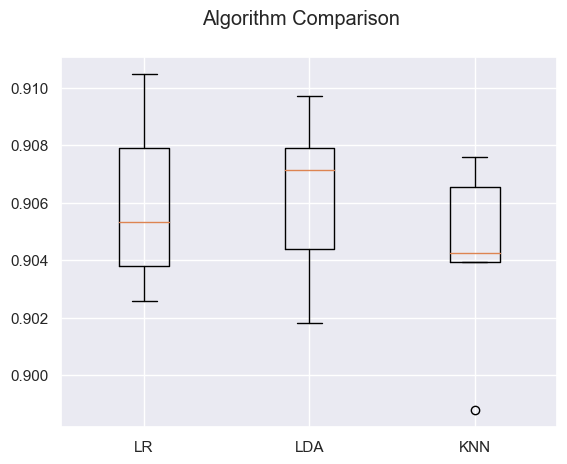

In [126]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[0:3])
ax.set_xticklabels(names[0:3])
pyplot.show()

    KNN here looks to be a bit untrustworthy, I would consider sticking with LR and LDA.

    I know from my lecture that scalng data can sometimes have an effect on our models. We want to maximize our accuracy so as a check, I am just going to look, especially since most of the columns I am using started off as continuous.

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

In [128]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))

In [129]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.908012 (0.002502)
ScaledLDA: 0.906191 (0.002774)
ScaledKNN: 0.906798 (0.002979)
ScaledCART: 0.894355 (0.002258)
ScaledNB: 0.841214 (0.002690)
ScaledSVM: 0.910835 (0.002710)


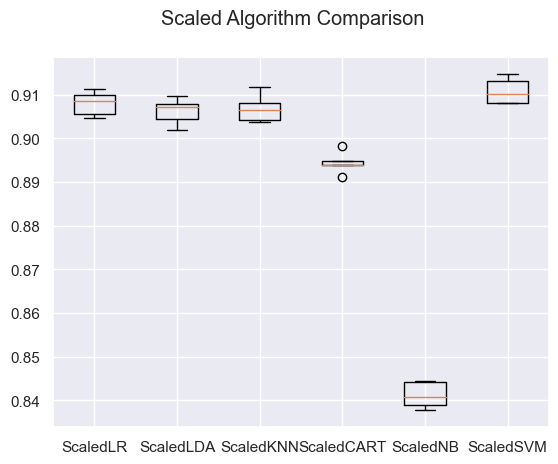

In [130]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

    SVM saw a drastic jump to reveal our best score yet! It looks very evenly distributed as well! Most of the others didn't change much. 

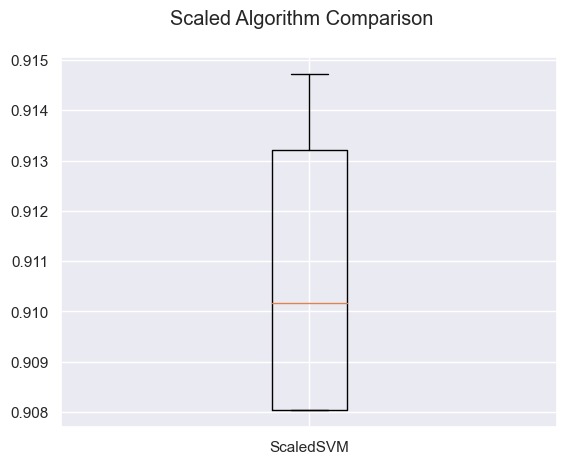

In [131]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[5:])
ax.set_xticklabels(names[5:])
pyplot.show()

    I'm content to suggest SVC as the best classifier model for this data set, granted the data is scaled as I have shown.

    SUMMARY

I first looked into my data to see what I was dealing with value wise. I had a handful of both numeric and non numeric values and needed to find a way to find my prediction target, whether or not a client has subscribed to a term deposit. I needed a digestible way to see correlation between all my informational columns and my target column 'y/subscribed'. Using a correlation method to identify columns that a very high correltaion, whether positive or negative, and chose to go from there. Fortunately, I only had to change one non numeric column! Which saved me a lot of work. Through some EDA I could see pretty clear that those who subscribed in the past, were likely too again, and that it can't hurt to keep reaching out! My start classifier model of KNNeighbors gave me a startign accuracy of 91% and while that is considered 'good' I wanted to see if I could get a better perfromance. I am not sure if I did something wrong.. but when I created Kfold scores for my classifier models, it wasn't quite the same for KNNeighbors, off by about a .5% margin. Keeping this in mind as I moved forward, I saw that if I scaled my data, something that I know can help the accuracy of a model, I saw that SVM (or SVC) was my best performing model in both accuracy % and clean distribution. Considering The KNN score in my models is well lower than my SVM score, I am inclined to suggest this model moving forward, but I need to understand what is casuing my different values. 

